In [32]:
%%bash
# rm ./src/*
rm -r ./src/
mkdir ./src/

In [2]:
flex_title = "Fintech architecture"
flex_author = "Author: Kamil Marczak"
flex_orientation = "columns"
flex_include_source = False
# flex_source_link = "https://github.com/unkletam/Investment_Flow_Type_Classification"
flex_vertical_layout = "scroll"

In [3]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 10px;
</style>

In [4]:

# import diagram_gen
import ipywidgets as widgets
import yaml
from IPython.display import display
from ipywidgets import Layout
from IPython.display import Image
from IPython.utils import io
import time

from IPython.display import Javascript, display

%load_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

# import pprint

# from diagram_gen import diagram_core_banking, diagram_kyc, diagram_lendings, diagram_2f, diagram_management, diagram_transaction

yaml_file = open("conf.yaml")
config_file = yaml.safe_load(yaml_file)

# pprint.pprint(config_file)

def printer(data):
    display(data)


def outputer(widget, method=None):
    # output = widgets.interactive_output(method, {'lendings': widget,})

    diagram = widgets.interactive_output(method, {'data': widget, })
    return diagram


def choice_outputer(widget):
    output = widgets.interactive_output(printer, {'data': widget, })
    return output

In [11]:
style = {'description_width': 'initial'}

layout = widgets.Layout(width='auto', height='auto')

# items_layout = Layout(width='auto')  # override the default width of the button to 'auto' to let the button grow
items_layout = Layout(display='flex',
                      width='100%',
                      flex_flow='row',
                      justify_content='space-between')  # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    height='100%',
                    width='100%')


diagram = Layout(display='flex',
                      height='auto',
                        width='auto',)

time_to_market = widgets.BoundedIntText(value=12, min=3, description="Time to Market",
                                        layout=items_layout)
# time_to_market_result = choice_outputer(time_to_market)


inhouse_out = widgets.Dropdown(options=config_file["Inhouse or external"], description='Inhouse or external',
                               disabled=False, layout=items_layout)
inhouse_out_result = choice_outputer(inhouse_out)

entity = widgets.Dropdown(options=config_file["Entity type"], description='Entity type', disabled=False,
                          layout=items_layout)
entity_results = choice_outputer(entity)
# display(entity, entity_results)

client_type = widgets.SelectMultiple(options=config_file["Client type"], description="Client type", disabled=False,
                                     layout=items_layout)


localization = widgets.Dropdown(
    options=config_file["Localisation"],
    description='Localisation',
    disabled=False,
    layout=items_layout,
)

# display(localization, localization.value)

brokerage = widgets.SelectMultiple(
    options=config_file["Brokerage"],
    description='Brokerage',
    disabled=False,
    layout=items_layout,
    continuous_update=True,
)

# brokerage_value = choice_outputer(brokerage)

# display(brokerage, brokerage_value)

transactions = widgets.SelectMultiple(
    options=config_file["Transactions"],
    description='Transactions',
    disabled=False,
    layout=items_layout,
)

# display(transactions, transactions.value)

management = widgets.SelectMultiple(
    options=config_file["Management"],
    description='Management',
    disabled=False,
    layout=items_layout,
)

# display(management, management.value)

security = widgets.SelectMultiple(
    options=config_file["Security"],
    description='Security',
    disabled=False,
    layout=items_layout,
    value=("KYC", "2FA", "AML")
)

# display(security, security.value)

cards = widgets.SelectMultiple(
    options=config_file["Cards"],
    description='Cards',
    disabled=False,
    layout=items_layout,
)

# display(cards, cards.value)

client_interface = widgets.SelectMultiple(
    options=config_file["Client interface"],
    description='Client interface',
    disabled=False,
    layout=items_layout,
)

# display(client_interface, client_interface.value)

lendings = widgets.Dropdown(
    options=config_file["Lending"],
    description='Lending',
    disabled=False,
    layout=items_layout,
)

lendings_value = choice_outputer(lendings)
# display(lendings, lendings.value)

accounts = widgets.SelectMultiple(
    options=config_file["Accounts"],
    description='Accounts',
    disabled=False,
    layout=items_layout,
)

# display(accounts, accounts.value)

white_label = widgets.SelectMultiple(
    options=config_file["White lavel provider"],
    description='White lavel provider',
    disabled=False,
    layout=items_layout,
)

# display(white_label, white_label.value)

## Column 1

### Tab 1

In [6]:
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

items = [time_to_market, entity, client_type, localization, brokerage, transactions, management, security, cards, client_interface, lendings, 
         accounts, white_label]

box = widgets.Box(children=items, layout=box_layout)
display(box)

Box(children=(BoundedIntText(value=12, description='Time to Market', layout=Layout(display='flex', flex_flow='…

### Delete Old Diagram

In [7]:
def clean(*arg):
    display(Javascript('Jupyter.notebook.execute_cells([0])'))

out = widgets.Output(layout={'border': '1px solid black'})
with out:
    button = widgets.Button(description="Delete Old Diagrams", layout=items_layout, button_style='danger')
    button.on_click(clean)
    display(button)
display(out)

Output(layout=Layout(border='1px solid black'))

### Reload

In [34]:
# %env SERVER_NAME

display(transactions.value)

items_layout = Layout( width='100%', height='100%', )     # override the default width of the button to 'auto' to let the button grow

def refesh_rows_below(*args):
    from IPython.display import Javascript
    display(Javascript('IPython.notebook.execute_cells_below()'))

def generate_diagram(time_to_market=time_to_market, entity=entity, client_type=client_type, localization=localization, brokerage=brokerage, \
                     transactions=transactions, management=management, security=security, cards=cards, client_interface=client_interface, \
                     lendings=lendings, accounts=accounts, white_label=white_label):
    
#     %run ./diagram_gen/architecture_generator.py --time_to_market $(time_to_market.value) --entity $(entity.value) --client_type $(client_type.value) \
#     --localization $(localization.value) --brokerage $(brokerage.value) --transactions $(transactions.value) --management $(management.value) \
#     --security $(security.value) --cards $(cards.value) --client_interface $(client_interface.value) --lendings $(lendings.value) --accounts $(accounts.value) \
#     --white_label $(white_label.value)

    %run ./diagram_gen/architecture_generator.py --time_to_market time_to_market.value --entity entity.value --client_type client_type.value \
    --localization localization.value --brokerage brokerage.value --transactions transactions.value --management management.value \
    --security security.value --cards cards.value --client_interface client_interface.value --lendings lendings.value --accounts accounts.value \
    --white_label white_label.value
    
    
#     refesh_rows_below()

out = widgets.Output(layout={'border': '1px solid black'})
with out:
    button = widgets.Button(description="Create Diagramt", layout=items_layout, button_style='danger')
    button.on_click(generate_diagram)
    display(button)
display(out)

()

Output(layout=Layout(border='1px solid black'))

In [23]:
def import_image(filename):
    Image(filename=f'./src/{filename}')

## Column 2

### core banking solution

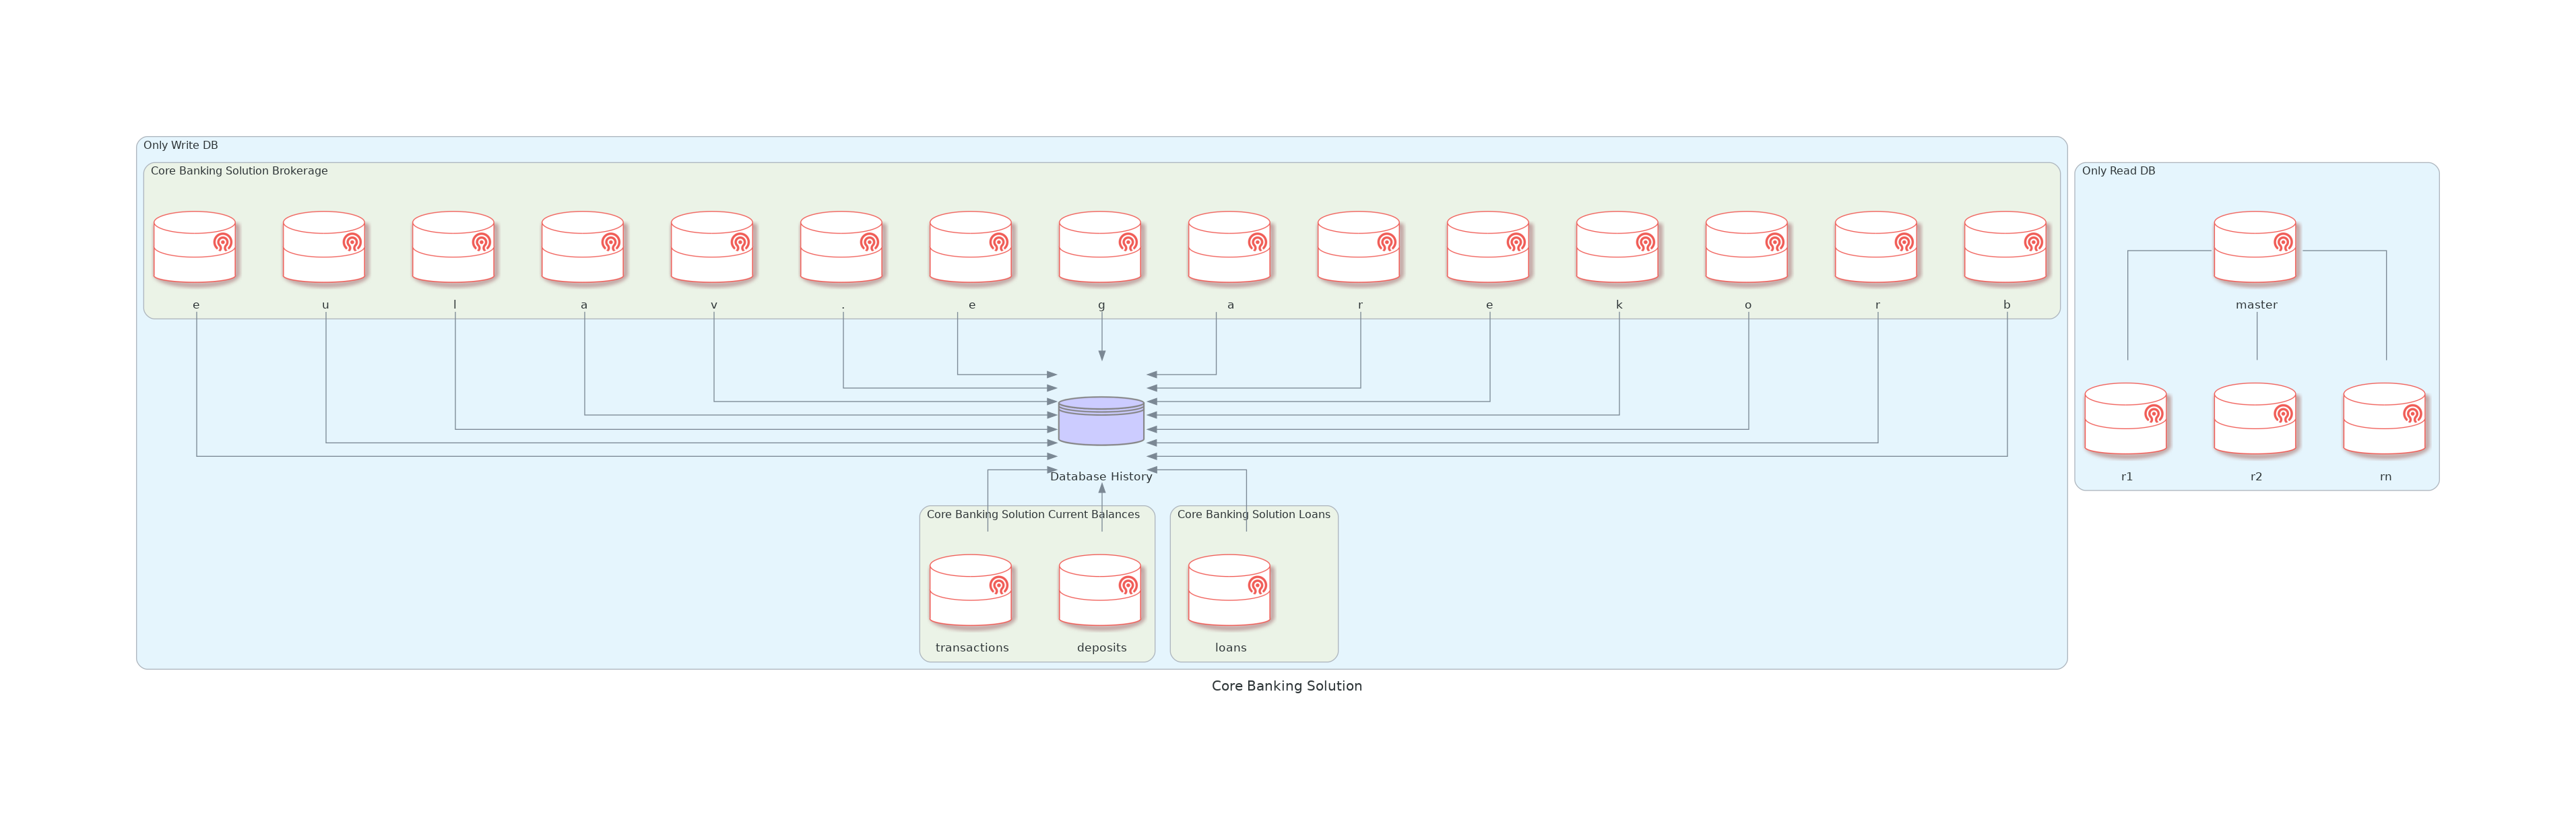

In [24]:
d_management = widgets.interactive_output(diagram_management, {"core_banking.png": management})
core_banking_image = Image(filename='./src/core_banking.png')
display(core_banking_image)

### Lendings

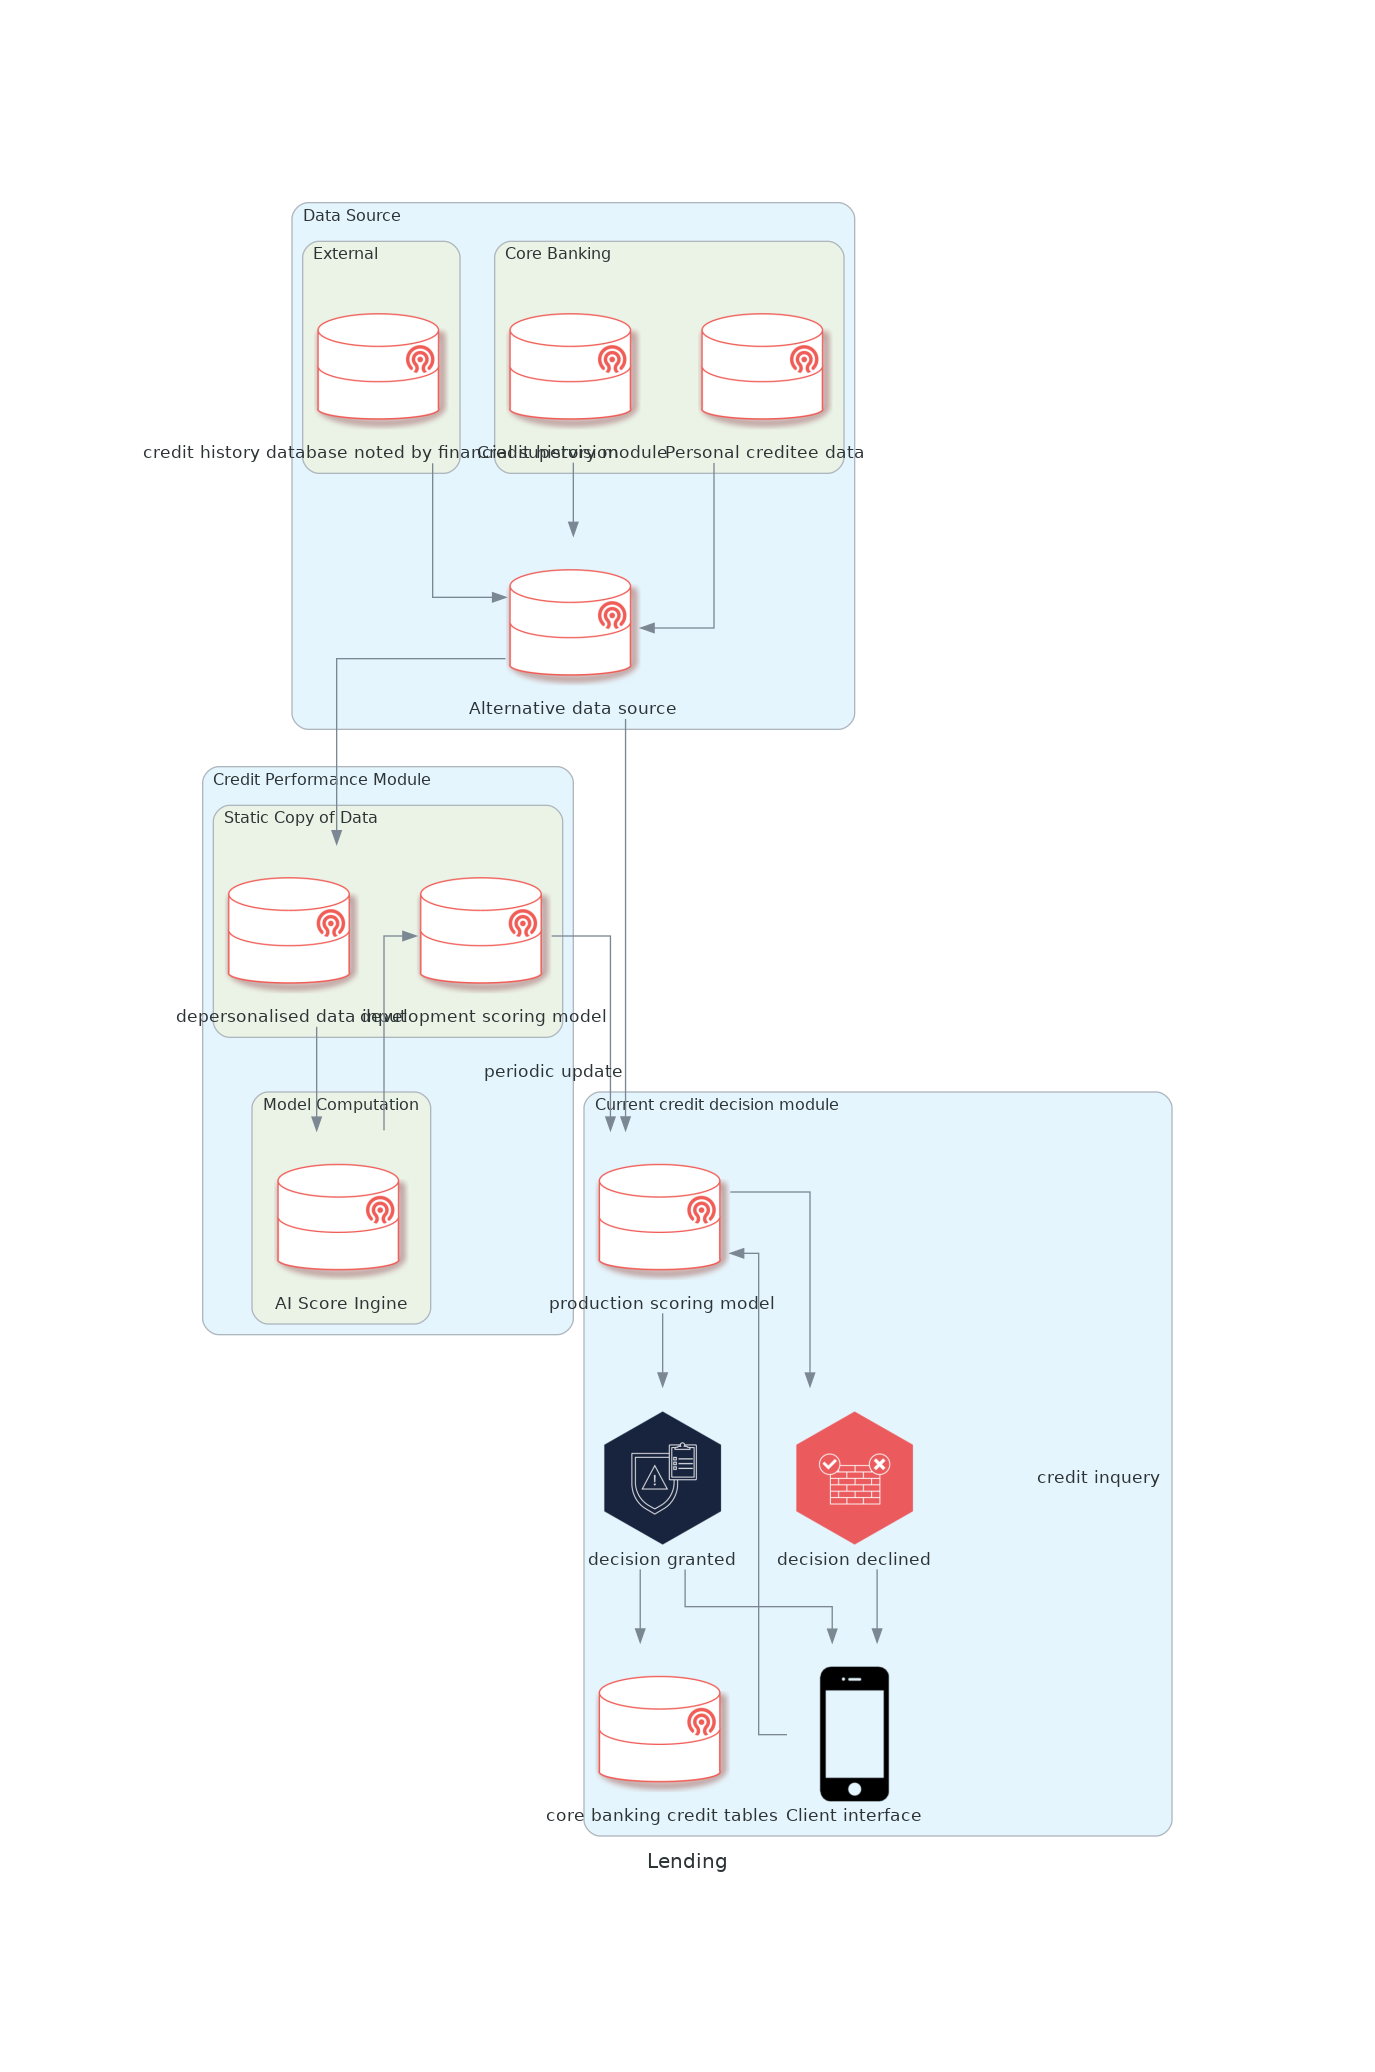

In [25]:
lendings_image = Image(filename='./src/lending.png')
display(lendings_image)

# d_len =  widgets.interactive_output(diagram_lendings, {'lendings': lendings})
# display(d_len)

### KYC

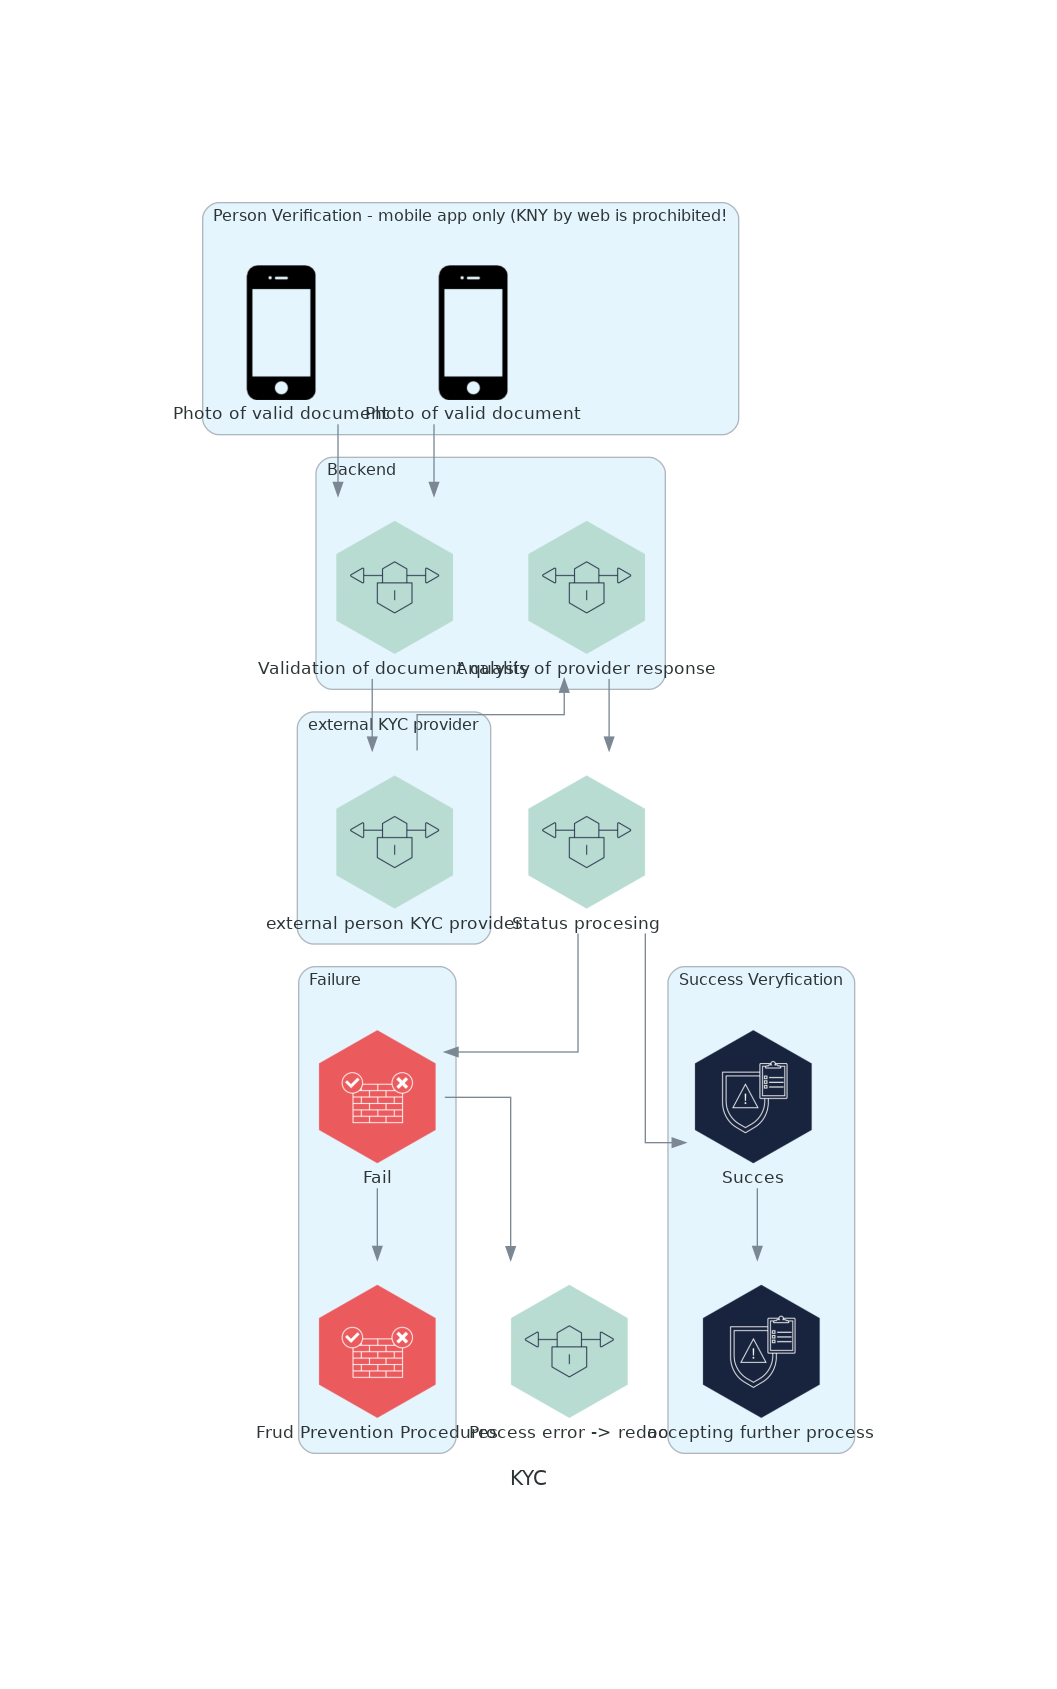

In [26]:
kyc_image = Image(filename='./src/KYC.png')
display(kyc_image)

# d_kyc = widgets.interactive_output(diagram_kyc, {'client_type': client_type, "security": security})

# display(d_kyc)


### 2FA

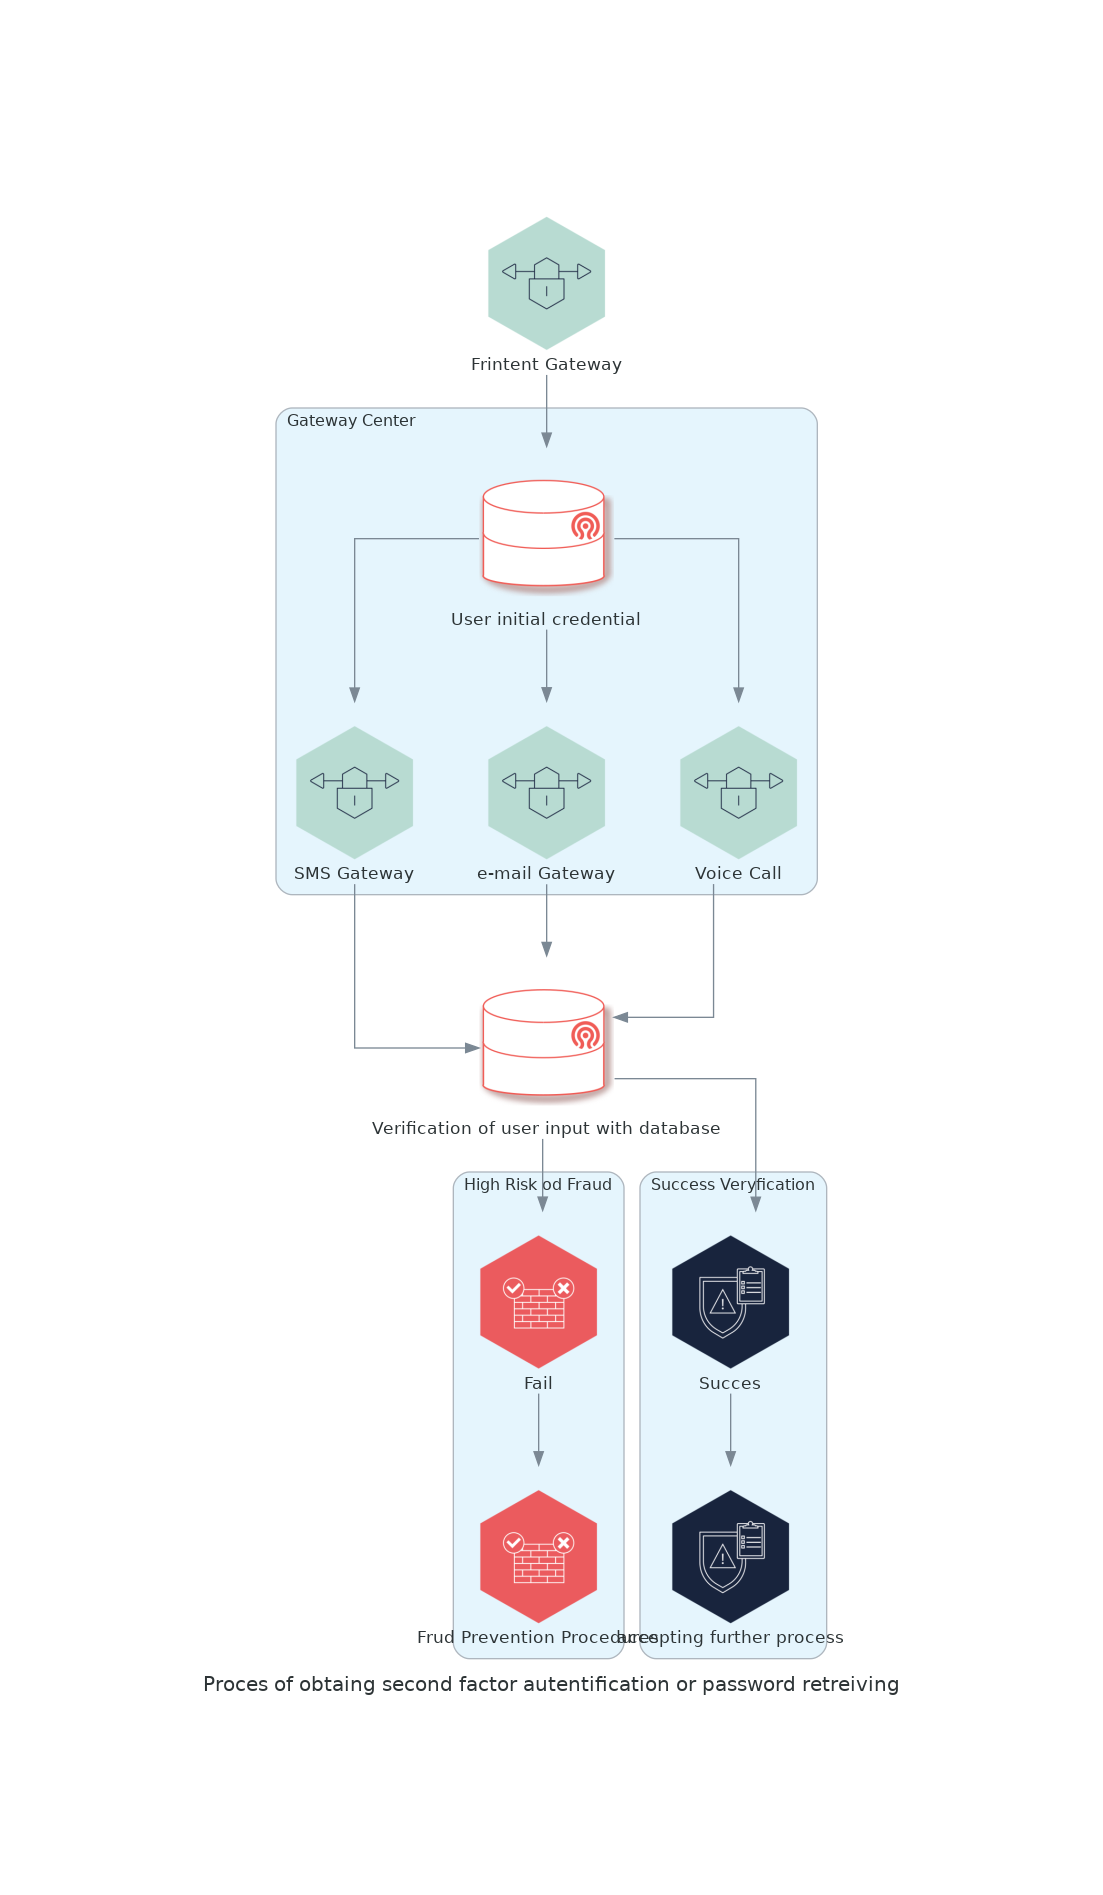

In [27]:
d_2f = Image(filename='./src/2FA.png')
display(d_2f)
# d_2f = widgets.intera

### Management

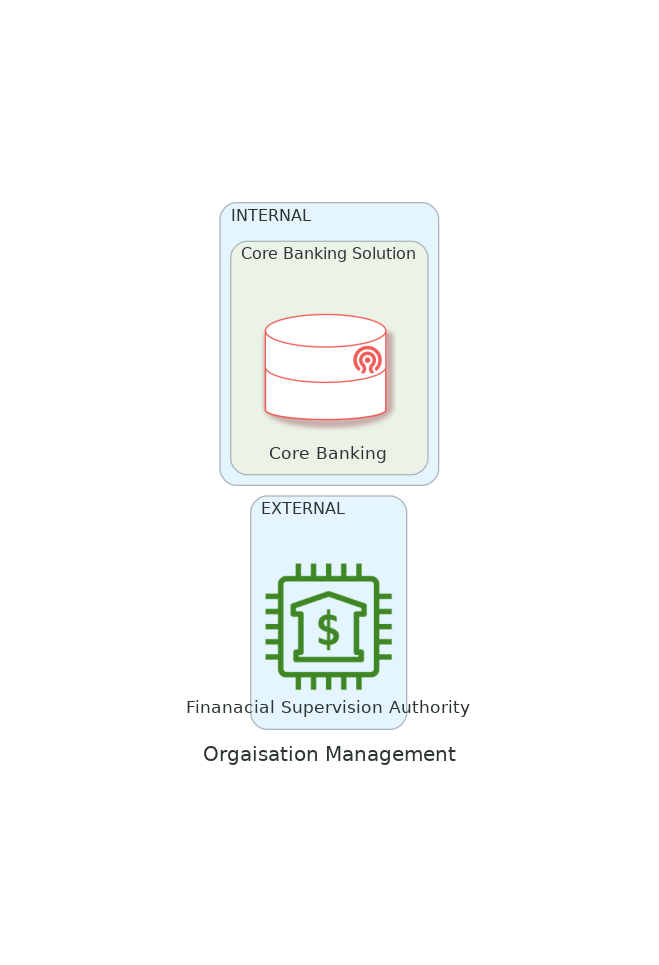

In [28]:
# import importlib
# importlib.reload(diagram_gen)
d_management = Image(filename='./src/management.png')
display(d_management)

### Transactions

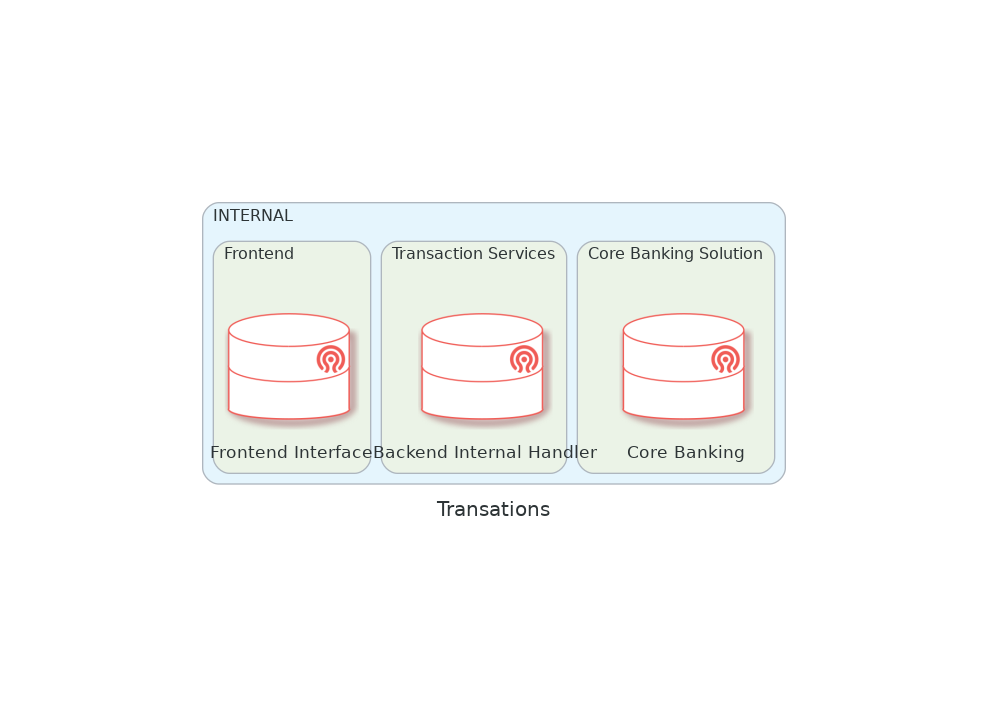

In [29]:
d_transactions = Image(filename='./src/transactions.png')
display(d_transactions)

